In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [7]:
#read data
df = pd.read_csv("https://raw.githubusercontent.com/JhesorleyML/Lectures/refs/heads/main/Time%20Series%20Forecasting/Seasonal_sample.csv")

In [8]:
#Convert to datetime
df["Time"]= pd.to_datetime(df["Time"])
df = df.set_index("Time")

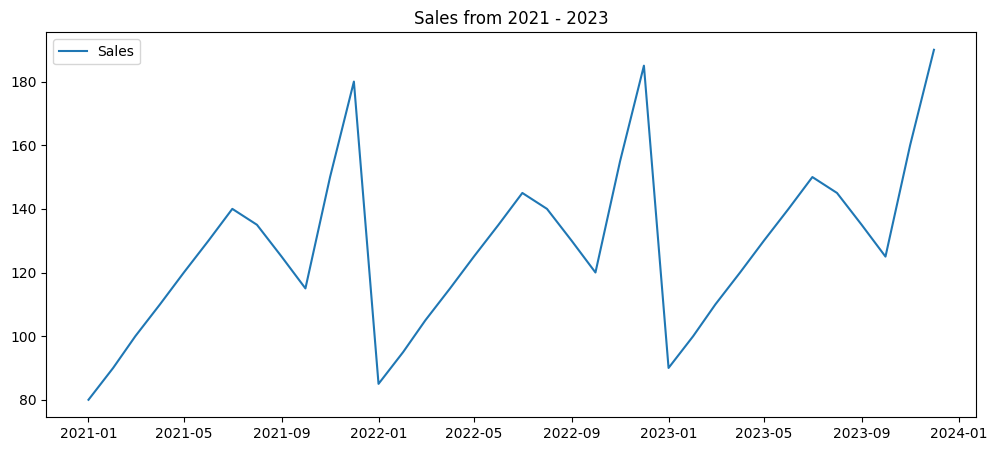

In [9]:
plt.figure(figsize = (12,5))
plt.plot(df['Sales'], label='Sales')

plt.legend()
plt.title('Sales from 2021 - 2023')
plt.show()

In [12]:
# sales(t)  →  time domain
# strength(k)  →  frequency domain
# instead of what happened at month t?
# what repeating cycles exist and how strong are they?
sales = df["Sales"].values
N = len(sales)
fft_val = np.fft.fft(sales)
magnitude = np.abs(fft_val)
freqs = np.fft.fftfreq(N)

In [14]:
freqs

array([ 0.        ,  0.02777778,  0.05555556,  0.08333333,  0.11111111,
        0.13888889,  0.16666667,  0.19444444,  0.22222222,  0.25      ,
        0.27777778,  0.30555556,  0.33333333,  0.36111111,  0.38888889,
        0.41666667,  0.44444444,  0.47222222, -0.5       , -0.47222222,
       -0.44444444, -0.41666667, -0.38888889, -0.36111111, -0.33333333,
       -0.30555556, -0.27777778, -0.25      , -0.22222222, -0.19444444,
       -0.16666667, -0.13888889, -0.11111111, -0.08333333, -0.05555556,
       -0.02777778])

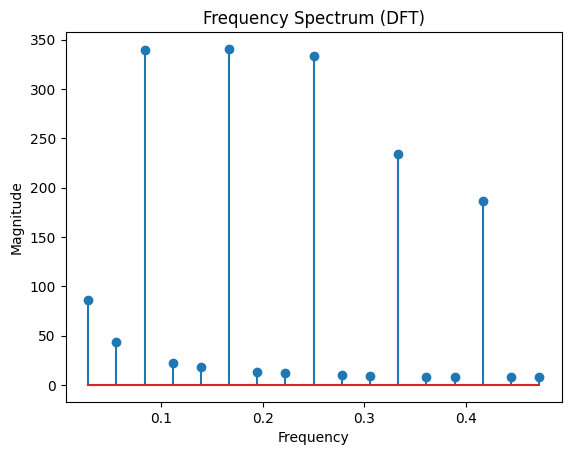

In [15]:
plt.stem(freqs[1:N//2], magnitude[1:N//2])  # only half (mirror symmetry)
# plt.stem(freqs_d[1:N//2], magnitude[1:N//2]) #SKIP K=0
# plt.yscale("log")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum (DFT)")
plt.show()

In [9]:
# period = 1/freq
# 1/0.083 = 12 => 12-month cycle (Yearly Seasonality)
# 1/0.166 = 6 => 6 month pattern
# 1/0.25 = 4 => 4 month oscillation

#DFT successfully detects => trend + seasonality